# Creditcard fraud detection


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow.keras as keras
from scikeras.wrappers import KerasClassifier

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

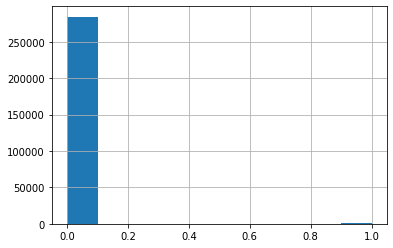

In [49]:
data["Class"].hist()

In [5]:
#as we can see the dataset is hugely imbalanced as we would imagine when dealing with fraud
492/284315

0.0017304750013189597

In [6]:
#sampling to deal with imbalanced dataset, ofcourse we only modify the training set, and never touch the test set
y = data["Class"].iloc[:50000]
X = data.iloc[:50000,1:5]

In [7]:
print(X, y)

             V1        V2        V3        V4
0     -1.359807 -0.072781  2.536347  1.378155
1      1.191857  0.266151  0.166480  0.448154
2     -1.358354 -1.340163  1.773209  0.379780
3     -0.966272 -0.185226  1.792993 -0.863291
4     -1.158233  0.877737  1.548718  0.403034
...         ...       ...       ...       ...
49995 -1.007648  0.722149  0.779027 -1.466661
49996 -5.202399  2.077079 -3.905209  1.097967
49997 -1.597980 -0.363988  2.114888 -1.101263
49998 -2.998734  2.323844 -2.419829  0.941745
49999  0.618650 -1.744738  0.367658 -1.486308

[50000 rows x 4 columns] 0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Class, Length: 50000, dtype: int64


In [8]:
X.shape

(50000, 4)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)

In [10]:
over = RandomOverSampler(random_state=3)

X_train_over, y_train_over = over.fit_resample(X_train, y_train)


# Class balance after OVERsampling
print(sorted(Counter(y_train_over).items()))

[(0, 39885), (1, 39885)]
[(0, 115), (1, 115)]


In [11]:
#now that we have created a balanced dataset it is time to train some models

In [12]:
SVM_over = SVC(probability = True)

SVM_over.fit(X_train_over, y_train_over)

SVM_over.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
SVM_over.score(X_test, y_test)

0.9671

In [15]:
#performance metric
#we would like to maximize the true positive rate and capture as many fraud cases as possible, 
#so recall for the minority class is the metric we would like to optimize, whith minimum tradeoff in false positives.

print(classification_report(y_test, SVM_over.predict(X_test)), confusion_matrix(y_test, SVM_over.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9967
           1       0.09      1.00      0.17        33

    accuracy                           0.97     10000
   macro avg       0.55      0.98      0.58     10000
weighted avg       1.00      0.97      0.98     10000
 [[9638  329]
 [   0   33]]


In [17]:
reg_over = LogisticRegression()

reg_over.fit(X_train_over, y_train_over)

LogisticRegression()

In [18]:
print(classification_report(y_test, reg_over.predict(X_test)), confusion_matrix(y_test, reg_over.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9967
           1       0.09      0.97      0.17        33

    accuracy                           0.97     10000
   macro avg       0.55      0.97      0.58     10000
weighted avg       1.00      0.97      0.98     10000
 [[9655  312]
 [   1   32]]


In [19]:
nn = Sequential()
nn.add(Dense(units = 4, activation = "sigmoid"))
nn.add(Dense(units = 18, activation = "sigmoid"))
nn.add(Dense(units = 18, activation = "sigmoid"))
nn.add(Dense(units = 1, activation = "sigmoid"))

opti = keras.optimizers.Adam(learning_rate = 0.0001)
nn.compile(loss = "binary_crossentropy")

In [20]:
history = nn.fit(X_train_over, y_train_over, epochs = 500, verbose = 0, validation_split = 0.2)

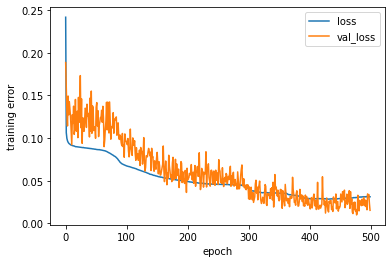

In [21]:
plt.figure("Model training")
plt.ylabel("training error")
plt.xlabel("epoch")
for i in history.history.keys():
    plt.plot(history.history[i], label = i)
plt.legend(loc = "best")

In [22]:
#Scikit wrapper so we can use Keras in the votingClassifier
nn_clf = KerasClassifier(model = nn, optimizer="adam", epochs=500, verbose=0)

In [37]:
#NN returns % chance of given point being class 1 or 0 and confusion_matrix needs a 1 or 0
nn_pred = nn.predict(X_test).round(2)
y_predicted = np.where(nn_pred > 0.5, 1, 0)
y_predicted

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [38]:
confusion_matrix(y_test, y_predicted)

array([[9792,  175],
       [   5,   28]], dtype=int64)

In [23]:
for model in [nn_clf, reg_over, SVM_over]:
    model._estimator_type = "classifier"

In [24]:
ensemble = VotingClassifier(estimators=[("Sequential", nn_clf), ("LogisticRegression", reg_over), ("SVC", SVM_over)], voting='soft')

In [25]:
ensemble.fit(X_train_over, y_train_over)

INFO:tensorflow:Assets written to: C:\Users\rasmu\AppData\Local\Temp\tmppu6xlpo5\assets


VotingClassifier(estimators=[('Sequential',
                              KerasClassifier(epochs=500, model=<keras.engine.sequential.Sequential object at 0x0000021F9D12D490>, optimizer='adam', verbose=0)),
                             ('LogisticRegression', LogisticRegression()),
                             ('SVC', SVC(probability=True))],
                 voting='soft')

In [26]:
print(classification_report(y_test, ensemble.predict(X_test)), confusion_matrix(y_test, ensemble.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9967
           1       0.18      0.94      0.31        33

    accuracy                           0.99     10000
   macro avg       0.59      0.96      0.65     10000
weighted avg       1.00      0.99      0.99     10000
 [[9829  138]
 [   2   31]]
